C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_10444\1617238733.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


        date  price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
                                date        price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


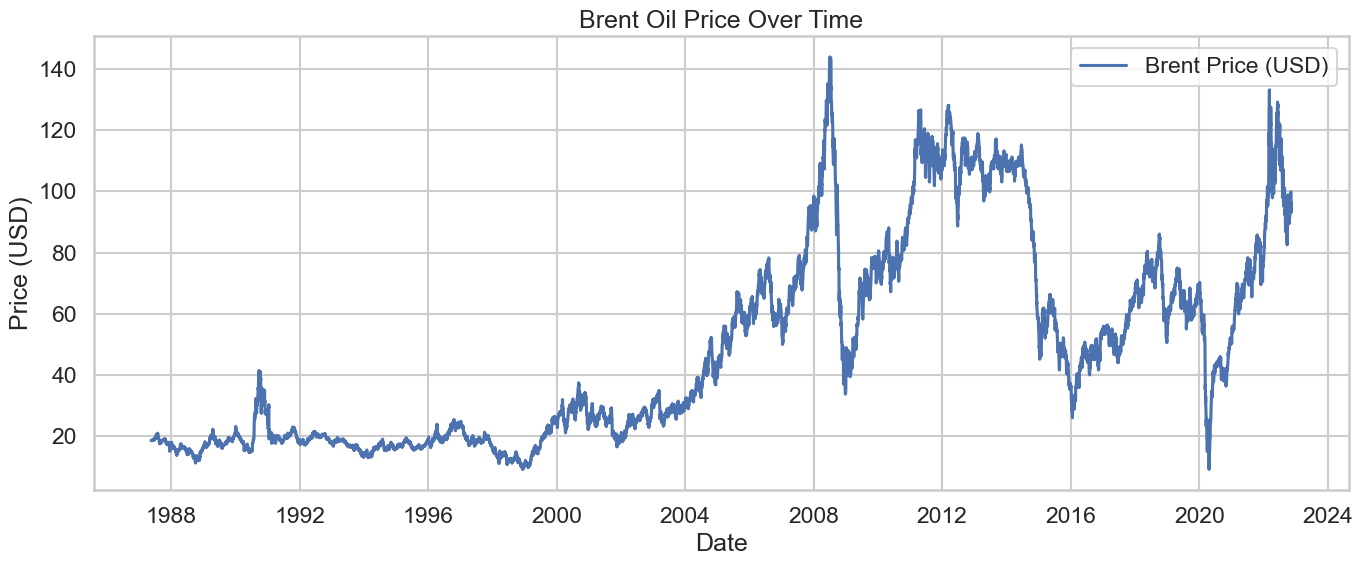

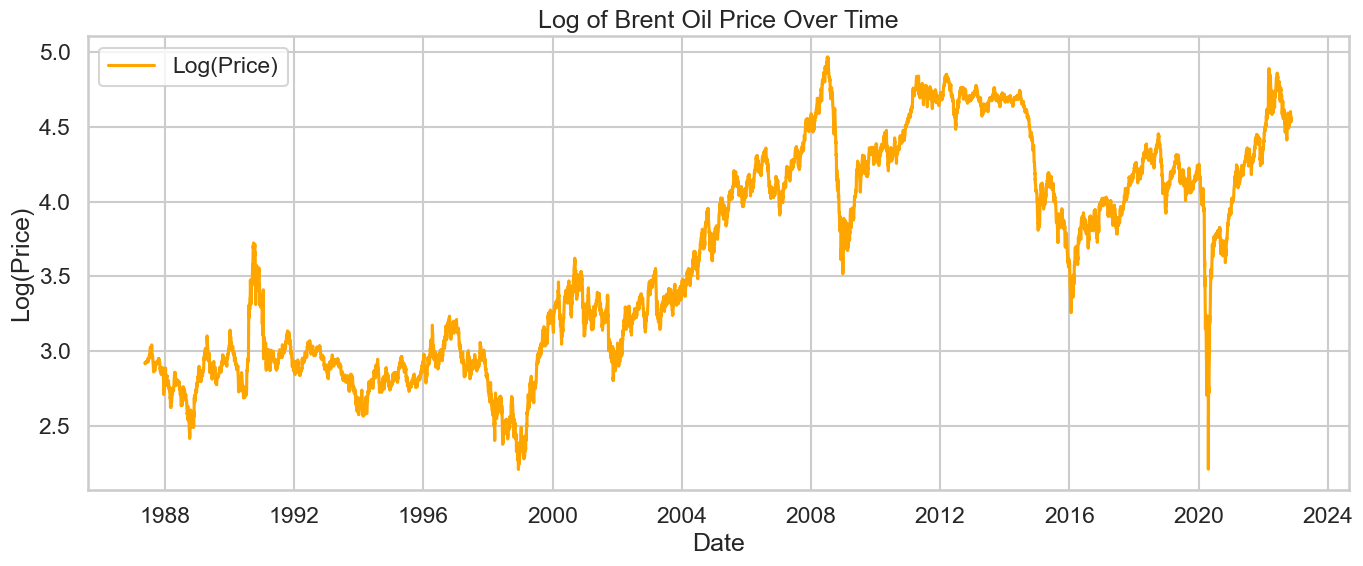

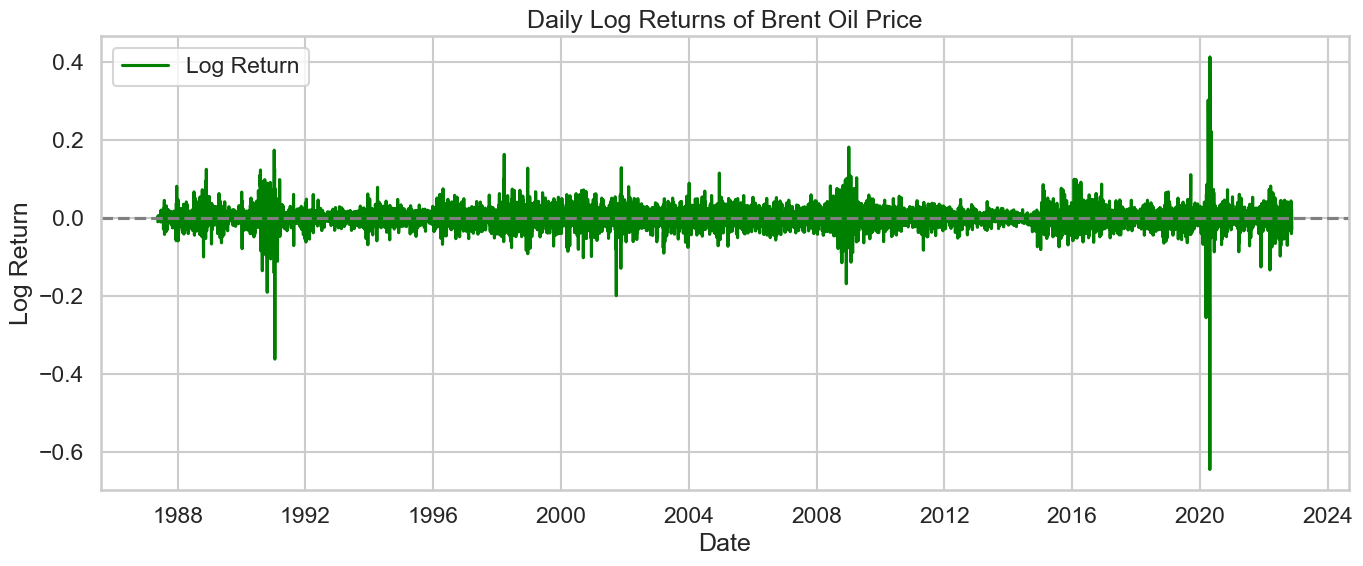

ADF Test on Log Returns:
ADF Statistic: -16.427113494485837
p-value: 2.4985801611432117e-29
Critical Values: {'1%': -3.4310783342658615, '5%': -2.861861876398633, '10%': -2.566941329781918}


In [3]:


# Brent Oil Price EDA
# Goal: Explore time series structure, identify volatility, stationarity, trends

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Configurations
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (14, 6)

# Load Data
df = pd.read_csv("../data/BrentOilPrices.csv")
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.sort_values('date')

# Inspect
print(df.head())
print(df.describe())

# Plot Raw Prices
plt.figure()
plt.plot(df['date'], df['price'], label='Brent Price (USD)')
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

# Compute log prices
df['log_price'] = np.log(df['price'])

# Plot Log Prices
plt.figure()
plt.plot(df['date'], df['log_price'], label='Log(Price)', color='orange')
plt.title("Log of Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Log(Price)")
plt.legend()
plt.tight_layout()
plt.show()

# Compute log returns
df['log_return'] = df['log_price'].diff()

# Plot Log Returns
plt.figure()
plt.plot(df['date'], df['log_return'], label='Log Return', color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Daily Log Returns of Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.tight_layout()
plt.show()

# ADF Test for stationarity (on log returns)
adf_result = adfuller(df['log_return'].dropna())
print("ADF Test on Log Returns:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

# Save transformed data for modeling
df.to_csv("../data/BrentOilPrices_transformed.csv", index=False)
